In [87]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib
import sklearn

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



from sklearn.metrics import mean_absolute_error, mean_squared_error

#importing a scoring metric to compare methods
from sklearn.metrics import r2_score
%matplotlib inline

#setting random number seed
myfavoritenumber = 13
seed = myfavoritenumber
np.random.seed(seed)

processed2 = pd.read_csv("../data/processed/processed.csv") #the .. goes one directory up (two periods)

In [88]:
processed2['active_calories_burned'].std()

624.7314961807097

In [89]:
from statsmodels.tsa.stattools import adfuller

In [90]:
processed2

,measurement_date,user_code,steps_count,active_calories_burned,distance,steps_speed,body_temperature_avg,pulse_average,stand_hours_total,total_number_of_flights_climbed,...,ACWR_z,over_train,gender_f,gender_m,age_range_18-24,age_range_25-34,age_range_35-44,age_range_45-54,age_range_55-64,age_range_65-74
0,2020-01-01,0d297d2410,4153.0,104.0,3060.0,32.980,36.370607,85.0,3.000000,8.000000,...,-4.219539e-15,0,0,1,0,0,1,0,0,0
1,2020-01-01,35c7355282,5327.4,465.0,3531.4,28.352,36.370607,73.0,3.333333,12.333333,...,-4.219539e-15,0,0,1,0,0,0,1,0,0
2,2020-01-01,4985083f4d,6501.8,826.0,4002.8,23.724,36.370607,88.0,3.666667,16.666667,...,-4.219539e-15,0,1,0,0,1,0,0,0,0
3,2020-01-01,5d200bd1c6,7676.2,1187.0,4474.2,19.096,36.370607,75.0,4.000000,21.000000,...,-4.219539e-15,0,1,0,0,0,1,0,0,0
4,2020-01-01,6be5033971,8850.6,1548.0,4945.6,14.468,36.370607,62.0,4.333333,28.000000,...,-4.219539e-15,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,2020-05-12,78cc008261,5360.0,994.2,473.0,32.020,36.000000,74.0,3.000000,15.000000,...,7.520491e-01,1,0,1,0,0,0,1,0,0
2120,2020-05-12,aa036185e3,5360.0,671.8,473.0,32.020,36.000000,68.0,3.000000,15.000000,...,-4.648862e-01,0,0,1,0,0,1,0,0,0
2121,2020-05-12,cf7e50bcde,5360.0,349.4,473.0,32.020,36.000000,86.0,3.000000,15.000000,...,-1.501283e+00,0,1,0,0,0,1,0,0,0
2122,2020-05-12,fde84801d8,5360.0,27.0,473.0,32.020,36.000000,70.0,3.000000,15.000000,...,-1.218057e+00,0,1,0,0,0,0,1,0,0


In [91]:
processed2.measurement_date = pd.to_datetime(processed2.measurement_date, format = '%Y-%m-%d')

In [92]:
len(processed2['user_code'].unique())

68

In [93]:
processed2.set_index(['measurement_date', 'user_code'], inplace=True) #reseting the index

In [94]:
processed2

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  ...        ACWR_z  over_train  \
measurement_date user_code              ...                             
2020-01-01       0d297d2410      118.0  ... -4.219539e-15           0   
                 35c7355282      128.0  ... -4.219539e-15           0   
                 4985083f4d      129.0  .

In [95]:
##TESTING PRIMARY FEATURES FOR STATIONARITY USING THE AUGMENTED DICKEY FULLER TEST
adf_test_acwr = adfuller(processed2['ACWR'])

In [96]:
adf_test_acwr

(-3.792936936163541,
 0.0029804117074484168,
 26,
 2097,
 {'1%': -3.4334722331103045,
  '5%': -2.86291926951847,
  '10%': -2.5675042582416148},
 2129.3691917182473)

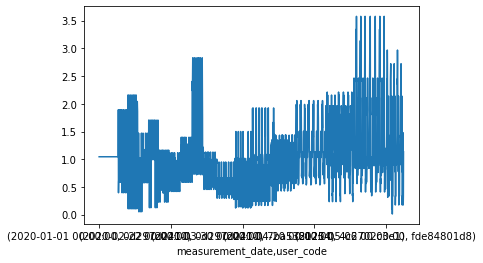

In [97]:
processed2["ACWR"].plot();

In [98]:
print("ADF = " + str(adf_test_acwr[0]))
print("p-value = " +str(adf_test_acwr[1]))

#ACWR IS STATIONARY!!!!!! NO TRANSFORMATION NECESSARY

ADF = -3.792936936163541
p-value = 0.0029804117074484168


In [99]:
adf_test_rmssd = adfuller(processed2['lnrmssd'])

In [100]:
print("ADF = " + str(adf_test_rmssd[0]))
print("p-value = " +str(adf_test_rmssd[1]))

#RMSSD IS STATIONARY!!!!!! (logged and exp) NO TRANSFORMATION NECESSARY

ADF = -7.812036664964919
p-value = 7.02789571369142e-12


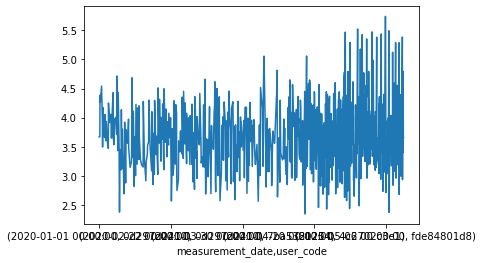

In [101]:
processed2["lnrmssd"].plot();

In [102]:
adf_test_kcal = adfuller(processed2['active_calories_burned'])
print("ADF = " + str(adf_test_kcal[0]))
print("p-value = " +str(adf_test_kcal[1]))

#RMSSD IS STATIONARY!!!!!! (logged and exp) NO TRANSFORMATION NECESSARY

ADF = -4.983891200119551
p-value = 2.3881312467693813e-05


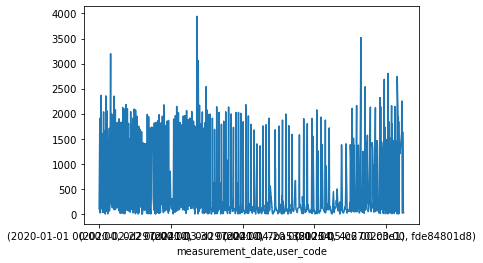

In [103]:
processed2["active_calories_burned"].plot();

In [104]:
from statsmodels.graphics import tsaplots

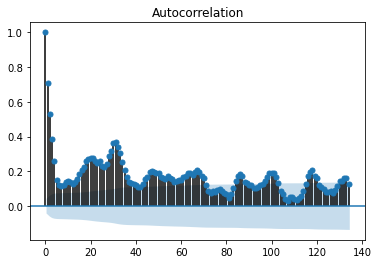

In [105]:
# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(processed2['ACWR'], lags=134)
plt.show()

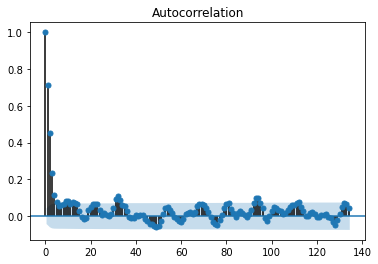

In [106]:
# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(processed2['lnrmssd'], lags=134)
plt.show()

In [107]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import preprocessing


In [108]:
processed2['distance_yds'] = (processed2['distance'] * 1.0936)

In [109]:
processed2['pulse_max'].mean()

104.35805084745765

In [110]:
processed2['pulse_max'].std()

26.630131193251586

In [111]:
processed2['active_calories_burned_norm'] = preprocessing.scale(processed2['active_calories_burned'])
processed2['steps_count_norm'] = preprocessing.scale(processed2['steps_count'])
processed2['distance_norm'] = preprocessing.scale(processed2['distance'])
processed2['steps_speed_norm'] = preprocessing.scale(processed2['steps_speed'])
processed2['body_temperature_avg_norm'] = preprocessing.scale(processed2['body_temperature_avg'])
processed2['pulse_average_norm'] = preprocessing.scale(processed2['pulse_average'])
processed2['stand_hours_total_norm'] = preprocessing.scale(processed2['stand_hours_total'])
processed2['total_number_of_flights_climbed_norm'] = preprocessing.scale(processed2['total_number_of_flights_climbed'])
processed2['pulse_min_norm'] = preprocessing.scale(processed2['pulse_min'])
processed2['pulse_max_norm'] = preprocessing.scale(processed2['pulse_max'])
processed2['average_spo2_value_norm'] = preprocessing.scale(processed2['average_spo2_value'])
processed2['distance_mi_norm'] = preprocessing.scale(processed2['distance_mi'])
processed2['ACWR_norm'] = preprocessing.scale(processed2['ACWR'])
processed2['height_in_norm'] = preprocessing.scale(processed2['height_in'])
processed2['weight_lbs_norm'] = preprocessing.scale(processed2['weight_lbs'])
processed2['rmssd_norm'] = preprocessing.scale(processed2['rmssd'])
processed2['bpm_norm'] = preprocessing.scale(processed2['bpm'])
processed2['heart_rate_norm'] = preprocessing.scale(processed2['heart_rate'])
processed2['BMI_norm'] = preprocessing.scale(processed2['BMI'])
processed2['distance_yds_norm'] = preprocessing.scale(processed2['distance_yds'])

In [112]:
processed2.reset_index(inplace=True) #date needs to be an index before you can do test/train split

In [113]:
processed2.set_index(['measurement_date', 'user_code'], inplace=True) #reseting the index

In [114]:
#doing a train/test split
range_train = pd.date_range(start = '2020-01-01', end = '2020-04-16') #doing an 80/20 split
df_train = processed2.loc[range_train]

range_test = pd.date_range(start = '2020-04-17', end = '2020-05-13')
df_test = processed2.loc[range_test]

In [115]:
drop = ['steps_count',
       'active_calories_burned', 'distance', 'steps_speed',
       'body_temperature_avg', 'pulse_average', 'stand_hours_total',
       'total_number_of_flights_climbed', 'pulse_min', 'pulse_max',
       'average_spo2_value', 'distance_mi', 'ACWR', 'height', 'weight',
       'height_in', 'weight_lbs', 'rmssd', 'pnn50', 'bpm', 'lnrmssd',
       'is_resting', 'heart_rate', 'BMI', 'lnrmssd_z', 'ACWR_z','distance_yds', 'distance_norm']
#ONLY RUN THIS ONCE!
df_train.drop(drop, axis = 1, inplace=True)  #removing non-normalized features and other features that will not be included
df_test.drop(drop, axis = 1, inplace=True)

/Users/davidkirui/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [116]:
df_test

over_train  gender_f  gender_m  age_range_18-24  \
measurement_date user_code                                                     
2020-04-17       01bad5a519           1         0         1                0   
                 0d297d2410           0         0         1                0   
                 0f2d7af30c           0         1         0                0   
                 1942df1c47           0         1         0                1   
                 276ab22485           0         0         1                0   
...                                 ...       ...       ...              ...   
2020-05-12       78cc008261           1         0         1                0   
                 aa036185e3           0         0         1                0   
                 cf7e50bcde           0         1         0                0   
                 fde84801d8           0         1         0                0   
2020-05-13       0d297d2410           0         0         1                0   

                             age_range_25-34  age_range_35-44  \
measurement_date user_code                                      
2020-04-17       01bad5a519                0                0   
                 0d297d2410                0                1   
                 0f2d7af30c                1                0   
                 1942df1c47                0                0   
                 276ab22485                0                0   
...                                      ...              ...   
2020-05-12       78cc008261                0                0   
                 aa036185e3                0                1   
                 cf7e50bcde                0                1   
                 fde84801d8                0                0   
2020-05-13       0d297d2410                0                1   

                             age_range_45-54  age_range_55-64  \
measurement_date user_code                                      
2020-04-17       01bad5a519                1                0   
                 0d297d2410                0                0   
                 0f2d7af30c                0                0   
                 1942df1c47                0                0   
                 276ab22485                1                0   
...                                      ...              ...   
2020-05-12       78cc008261                1                0   
                 aa036185e3                0                0   
                 cf7e50bcde                0                0   
                 fde84801d8                1                0   
2020-05-13       0d297d2410                0                0   

                             age_range_65-74  active_calories_burned_norm  \
measurement_date user_code                                                  
2020-04-17       01bad5a519                0                    -0.519883   
                 0d297d2410                0                    -0.541657   
                 0f2d7af30c                0                    -0.563432   
                 1942df1c47                0                    -0.585206   
                 276ab22485                0                    -0.606981   
...                                      ...                          ...   
2020-05-12       78cc008261                0                     0.791069   
                 aa036185e3                0                     0.274886   
                 cf7e50bcde                0                    -0.241297   
                 fde84801d8                0                    -0.757481   
2020-05-13       0d297d2410                0                    -0.757481   

                             ...  average_spo2_value_norm  distance_mi_norm  \
measurement_date user_code   ...                                              
2020-04-17       01bad5a519  ...                -1.779404         -0.003958   
                 0d297d2410  ...                -1.839874

In [117]:
df_train

over_train  gender_f  gender_m  age_range_18-24  \
measurement_date user_code                                                     
2020-01-01       0d297d2410           0         0         1                0   
                 35c7355282           0         0         1                0   
                 4985083f4d           0         1         0                0   
                 5d200bd1c6           0         1         0                0   
                 6be5033971           0         1         0                0   
...                                 ...       ...       ...              ...   
2020-04-16       c174f32d88           0         1         0                0   
                 cdf7848d2b           0         1         0                0   
                 d40dc56a36           0         1         0                0   
                 ebf2c3cb63           0         1         0                0   
                 fcf3ea75b0           0         1         0                0   

                             age_range_25-34  age_range_35-44  \
measurement_date user_code                                      
2020-01-01       0d297d2410                0                1   
                 35c7355282                0                0   
                 4985083f4d                1                0   
                 5d200bd1c6                0                1   
                 6be5033971                0                0   
...                                      ...              ...   
2020-04-16       c174f32d88                0                0   
                 cdf7848d2b                1                0   
                 d40dc56a36                0                1   
                 ebf2c3cb63                0                1   
                 fcf3ea75b0                0                0   

                             age_range_45-54  age_range_55-64  \
measurement_date user_code                                      
2020-01-01       0d297d2410                0                0   
                 35c7355282                1                0   
                 4985083f4d                0                0   
                 5d200bd1c6                0                0   
                 6be5033971                1                0   
...                                      ...              ...   
2020-04-16       c174f32d88                1                0   
                 cdf7848d2b                0                0   
                 d40dc56a36                0                0   
                 ebf2c3cb63                0                0   
                 fcf3ea75b0                1                0   

                             age_range_65-74  active_calories_burned_norm  \
measurement_date user_code                                                  
2020-01-01       0d297d2410                0                    -0.634199   
                 35c7355282                0                    -0.056214   
                 4985083f4d                0                     0.521770   
                 5d200bd1c6                0                     1.099754   
                 6be5033971                0                     1.677739   
...                                      ...                          ...   
2020-04-16       c174f32d88                0                     1.728973   
                 cdf7848d2b                0                    -0.280363   
                 d40dc56a36                0                    -0.570156   
                 ebf2c3cb63                0                    -0.534132   
                 fcf3ea75b0                0                    -0.498108   

                             ...  average_spo2_value_norm  distance_mi_norm  \
measurement_date user_code   ...                                              
2020-01-01       0d297d2410  ...                 0.081163         -0.057480   
                 35c7355282  ...                 0.081163

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
df_train

over_train  gender_f  gender_m  age_range_18-24  \
measurement_date user_code                                                     
2020-01-01       0d297d2410           0         0         1                0   
                 35c7355282           0         0         1                0   
                 4985083f4d           0         1         0                0   
                 5d200bd1c6           0         1         0                0   
                 6be5033971           0         1         0                0   
...                                 ...       ...       ...              ...   
2020-04-16       c174f32d88           0         1         0                0   
                 cdf7848d2b           0         1         0                0   
                 d40dc56a36           0         1         0                0   
                 ebf2c3cb63           0         1         0                0   
                 fcf3ea75b0           0         1         0                0   

                             age_range_25-34  age_range_35-44  \
measurement_date user_code                                      
2020-01-01       0d297d2410                0                1   
                 35c7355282                0                0   
                 4985083f4d                1                0   
                 5d200bd1c6                0                1   
                 6be5033971                0                0   
...                                      ...              ...   
2020-04-16       c174f32d88                0                0   
                 cdf7848d2b                1                0   
                 d40dc56a36                0                1   
                 ebf2c3cb63                0                1   
                 fcf3ea75b0                0                0   

                             age_range_45-54  age_range_55-64  \
measurement_date user_code                                      
2020-01-01       0d297d2410                0                0   
                 35c7355282                1                0   
                 4985083f4d                0                0   
                 5d200bd1c6                0                0   
                 6be5033971                1                0   
...                                      ...              ...   
2020-04-16       c174f32d88                1                0   
                 cdf7848d2b                0                0   
                 d40dc56a36                0                0   
                 ebf2c3cb63                0                0   
                 fcf3ea75b0                1                0   

                             age_range_65-74  active_calories_burned_norm  \
measurement_date user_code                                                  
2020-01-01       0d297d2410                0                    -0.634199   
                 35c7355282                0                    -0.056214   
                 4985083f4d                0                     0.521770   
                 5d200bd1c6                0                     1.099754   
                 6be5033971                0                     1.677739   
...                                      ...                          ...   
2020-04-16       c174f32d88                0                     1.728973   
                 cdf7848d2b                0                    -0.280363   
                 d40dc56a36                0                    -0.570156   
                 ebf2c3cb63                0                    -0.534132   
                 fcf3ea75b0                0                    -0.498108   

                             ...  average_spo2_value_norm  distance_mi_norm  \
measurement_date user_code   ...                                              
2020-01-01       0d297d2410  ...                 0.081163         -0.057480   
                 35c7355282  ...                 0.081163

In [120]:
#doing a baseline logistic regression
import statsmodels.api as sm

In [121]:
total2 = pd.read_csv("../data/raw/total2.csv") #the .. goes one directory up (two periods)

In [122]:
del total2['Unnamed: 0'] #removing random index variable

In [123]:
total2.measurement_date = pd.to_datetime(total2.measurement_date, format = '%Y-%m-%d')
total2.set_index(['measurement_date','user_code'], inplace=True) #reseting the index

In [124]:
total2

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  ...       rmssd      pnn50        bpm  \
measurement_date user_code              ...                                     
2020-01-01       0d297d2410      118.0  ...   46.418063  17.704062  77.364888   
                 35c7355282      128.0  ...   46.418063  17.704062  77.364888   
         

In [125]:
total2['distance_yds'] = (total2['distance'] * 1.0936)

In [126]:
total2

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  ...      pnn50        bpm   lnrmssd  \
measurement_date user_code              ...                                   
2020-01-01       0d297d2410      118.0  ...  17.704062  77.364888  3.671046   
                 35c7355282      128.0  ...  17.704062  77.364888  3.671046   
                 

In [127]:
df_train.columns

Index(['over_train', 'gender_f', 'gender_m', 'age_range_18-24',
       'age_range_25-34', 'age_range_35-44', 'age_range_45-54',
       'age_range_55-64', 'age_range_65-74', 'active_calories_burned_norm',
       'steps_count_norm', 'steps_speed_norm', 'body_temperature_avg_norm',
       'pulse_average_norm', 'stand_hours_total_norm',
       'total_number_of_flights_climbed_norm', 'pulse_min_norm',
       'pulse_max_norm', 'average_spo2_value_norm', 'distance_mi_norm',
       'ACWR_norm', 'height_in_norm', 'weight_lbs_norm', 'rmssd_norm',
       'bpm_norm', 'heart_rate_norm', 'BMI_norm', 'distance_yds_norm'],
      dtype='object')

In [128]:
total2.columns

Index(['steps_count', 'active_calories_burned', 'distance', 'steps_speed',
       'body_temperature_avg', 'pulse_average', 'stand_hours_total',
       'total_number_of_flights_climbed', 'pulse_min', 'pulse_max',
       'average_spo2_value', 'distance_mi', 'ACWR', 'gender', 'age_range',
       'height', 'weight', 'height_in', 'weight_lbs', 'rmssd', 'pnn50', 'bpm',
       'lnrmssd', 'is_resting', 'heart_rate', 'BMI', 'lnrmssd_z', 'ACWR_z',
       'over_train', 'distance_yds'],
      dtype='object')

In [129]:
########################## BEGIN RUNNING MODELS ##########################

In [130]:
############### RUNNING RANDOM FOREST ON DATA WITH HRV AND ACWR INCLUDED ###########
##converting data to arrays for RF
#labels are the values that we want to predict:
train_labels = np.array(df_train['over_train'])

#remove the labels from the features
#axis 1 refers to the columns
train_features = df_train.drop('over_train', axis = 1)

#Saving feature names for later use
feature_list = list(train_features.columns)

#convert to numpy array
features = np.array(train_features)

In [131]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               class_weight = {0:1,1:1})

In [132]:
model.fit(train_features, train_labels)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_features='sqrt')

In [133]:
#Actual class predictions
##converting data to arrays for RF
#labels are the values that we want to predict:
test_labels = np.array(df_test['over_train'])

#remove the labels from the features
#axis 1 refers to the columns
test_features = df_test.drop('over_train', axis = 1)

#Saving feature names for later use
feature_list = list(test_features.columns)

#convert to numpy array
features = np.array(features)

rf_predictions = model.predict(test_features)

In [134]:
##Probabilities for each class
rf_probs = model.predict_proba(test_features)[:,1]

In [135]:
from sklearn.metrics import roc_auc_score

In [136]:
# Calculate roc auc
roc_value = roc_auc_score(test_labels, rf_probs)

In [137]:
roc_value #is it any surpise that the AUC is pretty much 1?

0.9862289358264082

In [138]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(test_labels, rf_predictions) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(test_labels, rf_predictions)) 
print('Report : ')
print(classification_report(test_labels, rf_predictions))

Confusion Matrix :
[[608   0]
 [ 18  96]]
Accuracy Score : 0.9750692520775623
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       608
           1       1.00      0.84      0.91       114

    accuracy                           0.98       722
   macro avg       0.99      0.92      0.95       722
weighted avg       0.98      0.98      0.97       722



In [139]:
######################## BEGINNING BOOSTING MODEL ##########################
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

In [142]:
X = train_features
y = train_labels

In [143]:
bdt.fit(X,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [144]:
X_test = test_features
y_test = test_labels


In [145]:
bdt_predictions = bdt.predict(X_test)
bdt_probs = bdt.predict_proba(X_test)[:,1]

In [146]:
# Calculate roc auc
roc_value = roc_auc_score(y_test, bdt_probs)
roc_value

0.9823695752539242

In [147]:
results = confusion_matrix(y_test, bdt_predictions) 

In [148]:
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, bdt_predictions)) 
print('Report : ')
print(classification_report(y_test, bdt_predictions))

Confusion Matrix :
[[606   2]
 [ 13 101]]
Accuracy Score : 0.9792243767313019
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       608
           1       0.98      0.89      0.93       114

    accuracy                           0.98       722
   macro avg       0.98      0.94      0.96       722
weighted avg       0.98      0.98      0.98       722

